# Decision Tree

* Decision tree is a type of supervised learning algorithm.
* It works for both categorical and continuous input and output variables.
* we split the population or sample into two or more homogeneous sets (or sub-populations) based
 on most significant splitter / differentiator in input variables.

** Types of Decision Trees**:
* *Categorical Variable Decision Tree* : Decision Tree which has categorical target variable then it called as categorical variable decision tree.
* *Continuous Variable Decision Tree* : Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree

**Important Terminology related to Decision Trees**

* **Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.
* **Splitting**: It is a process of dividing a node into two or more sub-nodes.
* **Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.
* **Leaf/ Terminal Node**: Nodes do not split is called Leaf or Terminal node.

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
%matplotlib inline

# Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [12]:
def plot_decision_boundary(clf, X, y, axes, iris =True, plot_training=True):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.1)
    if not iris:
        plt.contour(x0, x1, y_pred, alpha=0.8)
    if plot_training:
        plt.scatter(X[:, 0], X[:, 1], c = y)
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)       

Text(4.05,0.5,'(Depth=2)')

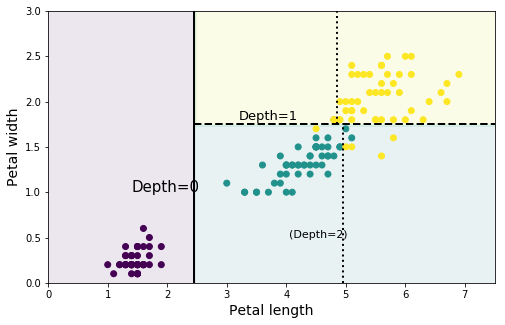

In [4]:
plt.figure(figsize=(8, 5))
plot_decision_boundary(tree_clf, X, y, [0, 7.5, 0, 3])
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

### Predicting classes and class probabilities

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

# How does a tree decide where to split?

* Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. 
* The creation of sub-nodes increases the homogeneity of resultant sub-nodes. 
* In other words, we can say that purity of the node increases with respect to the target variable. 
* Decision tree splits the nodes on all available variables and then selects the split which results 
in most homogeneous sub-nodes.

**Algorithm to select**:
* The algorithm selection is also based on type of target variables.

  *  **Gini Index**:
       * Gini index says, if we select two items from a population at random then they must be of same class and            probability for this is 1 if population is pure.
       * It works with categorical target variable “Success” or “Failure”.
       * It performs only Binary splits
       * Higher the value of Gini higher the homogeneity.
       * CART (Classification and Regression Tree) uses Gini method to create binary splits.
       * **Steps to Calculate Gini for a split**
            * Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure                   (p^2+q^2).
            * Calculate Gini for split using weighted Gini score of each node of that split.
  * **Chi-Square**:
      * It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by sum of squares of standardized differences between observed and expected frequencies of target variable.
          * It works with categorical target variable “Success” or “Failure”.
          * It can perform two or more splits.
          * Higher the value of Chi-Square higher the statistical significance of differences between sub-node and Parent node.
          * Chi-Square of each node is calculated using formula,
          * Chi-square = ((Actual – Expected)^2 / Expected)^1/2
          * It generates tree called CHAID (Chi-square Automatic Interaction Detector)
            <br>
            <br>
          * **Steps to Calculate Chi-square for a split**:
            * Calculate Chi-square for individual node by calculating the deviation for Success and Failure 
            both
            * Calculated Chi-square of Split using Sum of all Chi-square of success and Failure of each node 
            of the split
 * **Information Gain**:
     * The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches        zero when molecules are still and well ordered.
     * Information theory is a measure to define this degree of disorganization in a system known as Entropy.
     * If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided          (50% – 50%), it has entropy of one.
     <br>
     * Entropy can be calculated using formula:-
     <br>
     $$Entropy = $-plog_{2}p - q log_{2} q$ $$
      Here p and q is probability of success and failure respectively in that node.
     * It chooses the split which has lowest entropy compared to parent node and other splits. The lesser the              entropy, the better it is.
     <br>
    * **Steps to calculate entropy for a split**:
        * Calculate entropy of parent node.
        * Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes                 available in split.
     <br>
     <br>
  * **Reduction in Variance**:
     * we have discussed the algorithms for categorical target variable. 
     * Reduction in variance is an algorithm used for continuous target variables (regression problems). 
     * This algorithm uses the standard formula of variance to choose the best split. 
     * The split with lower variance is selected as the criteria to split the population:
     <br>
     <br>
      $$\frac{\sum (X - \bar{X})}{n}$$
      Above X-bar is mean of the values, X is actual and n is number of values.
    <br>
    <br>
     * **Steps to calculate Variance**:
       * Calculate variance for each node.
       * Calculate variance for each split as weighted average of each node variance.


# Gini Impurity or Entropy?

* By default, the Gini impurity measure is used.
* you can select the entropy impurity measure instead by setting the **criterion** hyperparameter to "entropy".
* The truth is, most of the time it does not make a big difference: they lead to similar trees.
* Gini impurity is slightly faster to compute, so it is a good default.

# Regularization Hyperparameters

### What are the key parameters of tree modeling and how can we avoid over-fitting in decision trees?

* if left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. Such a model is often called a **nonparametric model**.
* Overfitting is one of the key challenges faced while modeling decision trees. 
* If there is no limit set of a decision tree, it will give you 100% accuracy on training set because 
  in the worse case it will end up making 1 leaf for each observation. 
* we can prevent overfitting  in 2 ways:
    * Setting constraints on tree size
    * Tree pruning



### 1) Setting Constraints on Tree Size

\begin{array}{|c|c|c|}
\hline parameter & direction & away-from \\\hline
    MinSamplesSplit &  High & over-fitting \\\hline
    MinSamplesLeaf  & High & over-fitting  \\\hline
    MaxLeafNodes & Low & over-fitting \\\hline
    MaxFeatures  & Low & over-fitting \\\hline
    MaxDepth & Low & over-fitting \\\hline
\end{array}

* **Increasing** min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

# Compare with and without hyperparameter control

In [8]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

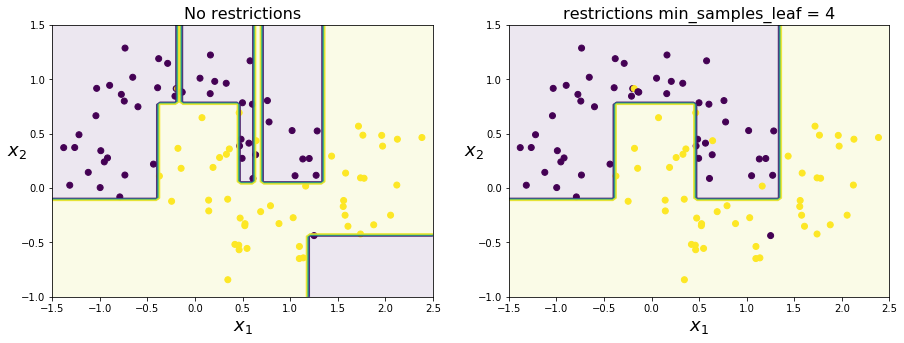

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, [-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, [-1.5, 2.5, -1, 1.5], iris=False)
x = plt.title("restrictions min_samples_leaf = 4", fontsize=16)